# Iris
The data is the classic "Iris" data set. The goal here is to predict the type of flower we are looking at with each entry based upon some characteristics in the table.

We are practicing Naive Bayes in week 3, so that's what we will be using here in this notebook.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# start renaming things so they are more convenient
xdata = data.data
xdata

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
ydata = data.target
ydata

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
class_labels = data.target_names
class_labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
column_names = data.feature_names
column_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Let's check to see how much the inputs (features) are correlated with each other

In [13]:
# blatantly copied and pasted from 
# https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum
# https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

# df = pd.DataFrame(data=xdata[1:,1:], index=xdata[1:,0], columns=xdata[0,1:]) 
# plt.matshow(df.corr())

# or maybe easier...

np.corrcoef(xdata.T)
# documentation: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.corrcoef.html

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

We can see here that our third and fourth columns are very strongly correlated (0.96) and our first column is pretty strongly correlated with the third and fourth columns (0.87, 0.81). We should watch out for this. The Naive Bayes algorithm assumes independence between features, and this could be problematic for our model accuracy.

In [14]:
# possibly look at making a nice colored correlation plot...

We can now look into performing a training/validation split. For this data, it should be reasonable to say there are no time series elements at play here. Therefore random sampling should really be OK.

We should also note that we have 150 observations, and that we will have to set aside some for validation. This would be potentially a good case for using cross validation or something similar to maximize the data we can train on, but for now I'll put this concern aside. Let's do our test/train split...

In [17]:
from sklearn.model_selection import train_test_split

# this function will do our training and test split
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, x_valid, y_train, y_valid = train_test_split(
    xdata, ydata, test_size = 0.30, random_state = 2019)

In [18]:
# check shapes
print("x_train")
print(x_train.shape)
print("x_valid")
print(x_valid.shape)
print("y_train")
print(y_train.shape)
print("y_valid")
print(y_valid.shape)

x_train
(105, 4)
x_valid
(45, 4)
y_train
(105,)
y_valid
(45,)


In [25]:
# check the training and validation classes to check if approximately equal
print(np.unique(y_train, return_counts = True))
print(np.unique(y_valid, return_counts = True))

(array([0, 1, 2]), array([31, 40, 34], dtype=int64))
(array([0, 1, 2]), array([19, 10, 16], dtype=int64))


Our dimensions line up which is good. There are slight class imbalances, but we are going to assume that this will not be significant for now. We can always go back and try a different random seed if we think it has adversely effected our modeling efforts.

At this stage, we are all good to go for modeling. Using scikit-learn's `GaussianNB` we will already have guassian (aka normal distribution) transformations done for us under the hood, so we don't have to worry about centering or scaling.

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB().fit(x_train, y_train)
y_pred_nb1 = nb_classifier.predict(x_valid)

print("Number of mislabeled points out of a total %d points : %d" % (y_valid.shape[0],(y_valid != y_pred_nb1).sum()))

Number of mislabeled points out of a total 45 points : 1


In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_valid, y_pred_nb1)
conf_matrix

array([[19,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 16]], dtype=int64)

So we have a pretty good functioning model, but we should go ahead and do some visualizations

In [70]:
def plot_with_two_axes(xdata, predictions, actuals, colname1, colname2):
    # load in data from numpy to pandas
    data = xdata
    col_dict = {}
    
    for i in range(xdata.shape[1]):
        col_dict[column_names[i]] = data[:,i]

    df = pd.DataFrame(col_dict)
    
    # create columns for predictions, actuals
    df['prediction'] = predictions
    df['actual'] = actuals
    df['incorrect'] = df['prediction'] != df['actual']

    # group so that we can plot these in different colors
    groups = df.groupby('prediction')

    # actual plotting of points
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

    for name, group in groups:
        ax.plot(group[colname1], group[colname2], marker='o', linestyle='', ms=6, label=name)
    ax.legend()

    # plotting of an additional red circle around incorrectly classified samples
    filtered = df['incorrect']
    df_bad = df[filtered]
    ax.plot(df_bad[colname1], df_bad[colname2], "ro", \
            ms=12, mew=.75, markerfacecolor="None", markeredgecolor='red', linestyle='')

    # axis names + showing
    plt.xlabel(colname1)
    plt.ylabel(colname2)

    plt.show()

In [71]:
def plot_all_combinations(xdata, predictions, actuals, all_column_names):
    plot_with_two_axes(xdata, predictions, actuals, all_column_names[0], all_column_names[1])
    plot_with_two_axes(xdata, predictions, actuals, all_column_names[0], all_column_names[2])
    plot_with_two_axes(xdata, predictions, actuals, all_column_names[0], all_column_names[3])
    plot_with_two_axes(xdata, predictions, actuals, all_column_names[1], all_column_names[2])
    plot_with_two_axes(xdata, predictions, actuals, all_column_names[1], all_column_names[3])
    plot_with_two_axes(xdata, predictions, actuals, all_column_names[2], all_column_names[3])

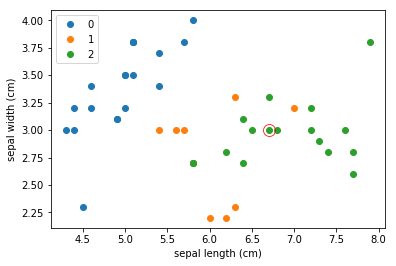

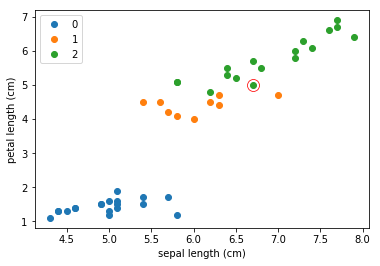

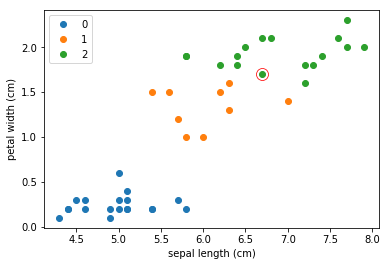

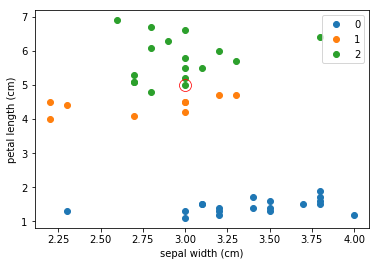

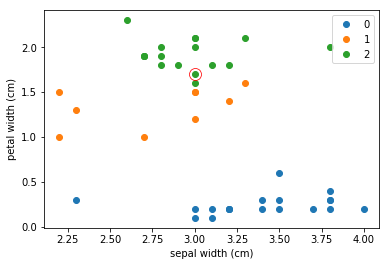

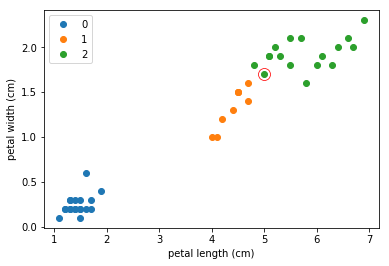

In [72]:
plot_all_combinations(x_valid, y_pred_nb1, y_valid, column_names)

Ok, so our Naive Bayes model performed really well. The one and only one we got wrong was right on the border of class 1 and class 2 in every dimension. We could label these with the actual flower types if we wanted but... I'm lazy here.

We had mentioned that we may have issues with highly correlated values. Let's try taking away petal width and see what the effect is.

In [73]:
xdata_dropped = xdata[:,0:xdata.shape[1]-1]
xdata_dropped

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [74]:
colnames_dropped = column_names[0:3]
len(colnames_dropped)

3

In [75]:
x_train2, x_valid2, y_train2, y_valid2 = train_test_split(
    xdata_dropped, ydata, test_size = 0.30, random_state = 2019)

In [76]:
nb_classifier = GaussianNB().fit(x_train2, y_train2)
y_pred_nb2 = nb_classifier.predict(x_valid2)

In [77]:
conf_matrix2 = confusion_matrix(y_valid, y_pred_nb2)
conf_matrix2

array([[19,  0,  0],
       [ 0,  7,  3],
       [ 0,  1, 15]], dtype=int64)

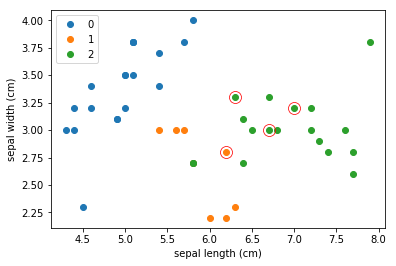

In [78]:
plot_with_two_axes(x_valid2, y_pred_nb2, y_valid2, colnames_dropped[0], colnames_dropped[1])

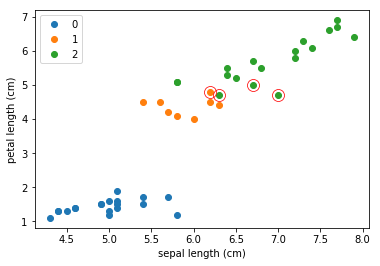

In [80]:
plot_with_two_axes(x_valid2, y_pred_nb2, y_valid2, colnames_dropped[0], colnames_dropped[2])

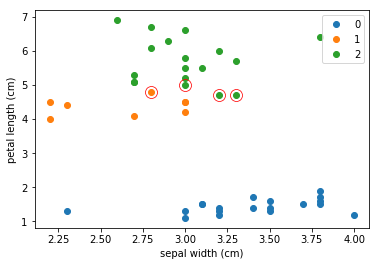

In [81]:
plot_with_two_axes(x_valid2, y_pred_nb2, y_valid2, colnames_dropped[1], colnames_dropped[2])

We can still see that we are having a hard time separating out class 1 and 2, but with less variables we now have less independent variables to create probability distributions. Basically, with fewer variables, we have fewer possible ways to distinguish the classes (even if they are highly correlated). 

The last thing I'll try to do is add in the meshgrid portion to plot out the region that we predict for each class

In [ ]:
# Still TODO
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_decision_boundary(X, col_indices, labels, model, h=.02):

    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    mins = [min(xdata[:,i]) for i in range(xdata.shape[1])]
    maxs = [max(xdata[:,i]) for i in range(xdata.shape[1])]
    grid_inputs = [np.arange(mins[i] - 1, maxs[i] + 1, h)]
    grid_outputs = 
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.plot(X[:, 0], X[:, 1], 'ro')
    plt.plot(X[np.where(labels==1), 0][0], 
         X[np.where(labels==1), 1][0], 'bo')

    return plt

In [99]:
np.meshgrid(np.arange(min(xdata[:,1]), max(xdata[:,1]), 0.01),np.arange(min(xdata[:,0]), max(xdata[:,0]), 0.01))

[array([[2.  , 2.01, 2.02, ..., 4.38, 4.39, 4.4 ],
        [2.  , 2.01, 2.02, ..., 4.38, 4.39, 4.4 ],
        [2.  , 2.01, 2.02, ..., 4.38, 4.39, 4.4 ],
        ...,
        [2.  , 2.01, 2.02, ..., 4.38, 4.39, 4.4 ],
        [2.  , 2.01, 2.02, ..., 4.38, 4.39, 4.4 ],
        [2.  , 2.01, 2.02, ..., 4.38, 4.39, 4.4 ]]),
 array([[4.3 , 4.3 , 4.3 , ..., 4.3 , 4.3 , 4.3 ],
        [4.31, 4.31, 4.31, ..., 4.31, 4.31, 4.31],
        [4.32, 4.32, 4.32, ..., 4.32, 4.32, 4.32],
        ...,
        [7.88, 7.88, 7.88, ..., 7.88, 7.88, 7.88],
        [7.89, 7.89, 7.89, ..., 7.89, 7.89, 7.89],
        [7.9 , 7.9 , 7.9 , ..., 7.9 , 7.9 , 7.9 ]])]

In [116]:
h = 0.05
mins = [min(xdata[:,i]) for i in range(xdata.shape[1])]
maxs = [max(xdata[:,i]) for i in range(xdata.shape[1])]
grid_inputs = [np.arange(mins[i] - 1, maxs[i] + 1, h) for i in range(len(mins))]
# grid_inputs
x1, x2, x3, x4 = np.meshgrid(*grid_inputs)
nb_classifier.predict(np.c_[x1, x2, x3])

ValueError: Found array with dim 4. Estimator expected <= 2.